# Graphs using matplotlib and seaborn
At the end of the page, I added the graph with the image of the player.

# Data Science 



1.   Data (Data Mining, Data Scraping, finding data sets): We want to find patterns in large data sets. Iterative process where just because you have some trends before doesn't mean there are new things to discover. 

*   Classification
*   Predictions
*   Data Reduction
*   Supervised vs unsupervised learning (HW2 Describe the differnce and run examples of both)
*   Building your model
*   Organize your data 


2.  Data Visualization: We want to present our data graphically

*   Most of time if you're doing the data analysis/science you are entrenched in the data, you understand all the trends, but you have present that to others in a way that makes it clear what you are trying to say. (Showing identfiable patterns or trends)
* Graphs bar, line, scatter, histograms, box and whisker, heatmaps

3. Dimension Reduction method and techniques: We want to convert data sets maybe use features to lessers dimensions that will provide the same information (you don't to have 89 different variables when 37 will do)(To get 37 of the most useful variable -- Cross validation)

*    Missing Values 
*    Low variance
*    Decision trees
*    Random forest
*    High Correlation 
*    Factor analysis (HW2 Question)
*    Backward Feature Elination


4. Simple and multiple linear regression (you know that there are other types)

5. K Nearest Neighbors 

6. Nueral Networks











How to Create NBA Shot Charts in Python

1. Webscraping
2. Data Visualization
3. Practical Example of Use

In [17]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Get our URL for Webscraping
# Link to a file with the information we want
# How to find that information is a little tricky
# Will send link on it
# that'll come with experience 

shot_chart_url = 'http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPAR;'\
                'AMS=2014-15&ContextFilter;=&ContextMeasure;=FGA&DateFrom;=&D;'\
                'ateTo=&GameID;=&GameSegment;=&LastNGames;=0&LeagueID;=00&Loca;'\
                'tion=&MeasureType;=Base&Month;=0&OpponentTeamID;=0&Outcome;=&'\
                'PaceAdjust=N&PerMode;=PerGame&Period;=0&PlayerID;=201935&Plu;'\
                'sMinus=N&Position;=&Rank;=N&RookieYear;=&Season;=2014-15&Seas;'\
                'onSegment=&SeasonType;=Regular+Season&TeamID;=0&VsConferenc;'\
                'e=&VsDivision;=&mode;=Advanced&showDetails;=0&showShots;=1&sh;'\
                'owZones=0'

shots_url2 = 'http://stats.nba.com/stats/playerdashptshotlog?'\
    'DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&'\
    'Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&' + \
    'PlayerID=202322&Season=2014-15&SeasonSegment=&'\
    'SeasonType=Regular+Season&TeamID=0&VsConference=&VsDivision='\

# The URL is sending us to a JSON file containing the data we want
# We specifically asking for DATA for James Harden 


In [ ]:
shot_chart_url3 = ('http://stats.nba.com/stats/shotchartdetail?Period=0&VsConference=&LeagueID=00&LastNGames=0&TeamID=0&Position=&Location=&Outcome=&ContextMeasure=FGA&DateFrom=&StartPeriod=&DateTo=&OpponentTeamID=0&ContextFilter=&RangeType=&Season=2015-16&AheadBehind=&PlayerID=201939&EndRange=&VsDivision=&PointDiff=&RookieYear=&GameSegment=&Month=0&ClutchTime=&StartRange=&EndPeriod=&SeasonType=Regular+Season&SeasonSegment=&GameID=&PlayerPosition=')
response = requests.get(shot_chart_url3)


In [ ]:
http://stats.nba.com/stats/shotchartdetail?CFID=33&CFPARAMS=2014-15&ContextFilter;=&ContextMeasure;=FGA&DateFrom;=&D;ateTo=&GameID;=&GameSegment;=&LastNGames;=0&LeagueID;=00&Loca;tion=&MeasureType;=Base&Month;=0&OpponentTeamID;=0&Outcome;=&PaceAdjust=N&PerMode;=PerGame&Period;=0&PlayerID;=201935&Plu;sMinus=N&Position;=&Rank;=N&RookieYear;=&Season;=2014-15&Seas;onSegment=&SeasonType;=Regular+Season&TeamID;=0&VsConferenc;e=&VsDivision;=&mode;=Advanced&showDetails;=0&showShots;=1&sh;owZones=0

In [ ]:
pip install nba_api

In [1]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)


In [5]:
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [6]:
# Get team ID based on team name
def get_team_id(t):
  for team in teams:
    if team['teamName'] == t:
      return team['teamId']
  return -1
  


# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [7]:
# Get the team ID number for the Knicks
# This is not working 
get_team_id("Atlanta Hawks")

1610612737

In [8]:
# Get the player ID number for LeBron James
get_player_id('Stephen', 'Curry')


201939

In [9]:
# Create JSON request
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

In [10]:
# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

In [11]:
# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

In [12]:
# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [13]:
# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [14]:
# Print the columns of our DataFrame
curry_data.columns


Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

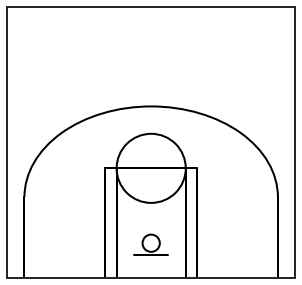

In [28]:
# This is a perfect example of sloppy code.... 
# They left out cruicial information that would have prevented us from finishing this example. 
# Luckily I have two sources

#bug fixed - indentented the content of the function - to make it work
#bug fixed - commented color ='blue'
def create_court(ax, color):
    # Function to draw basketball court
    #color = "blue"
      # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
      # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
      # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
     # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))

      # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
      # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

      # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)
    
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
    
ax = create_court(ax, 'black')


plt.show()

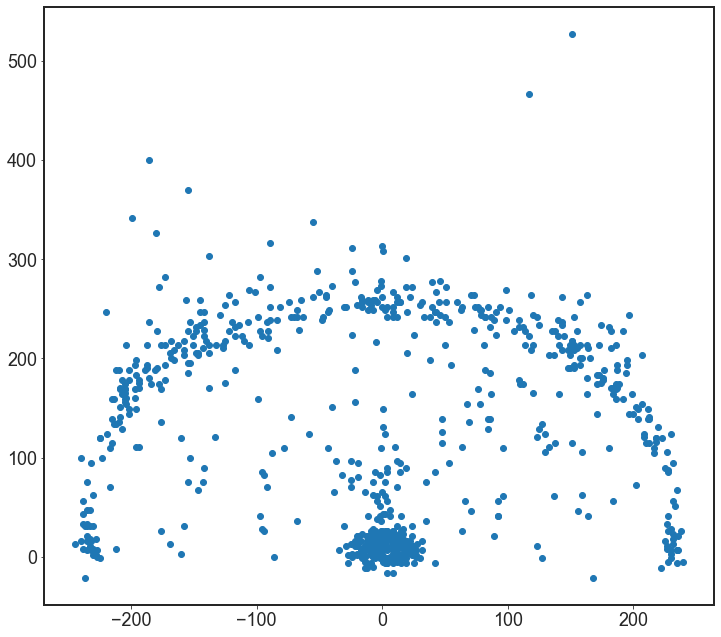

In [35]:
# Imported seaborn
# and modified the code from second source to get this initial shot chart that just has dots
# it was easy to modify since i knew how the json file was actually working


sns.set_style("ticks")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(curry_data.LOC_X, curry_data.LOC_Y)
plt.show()

In [20]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    # This was the part that was missing from the other code and how would i have known
    # that this needed to be a gca plot... I mean now i know from experience but that is sometimes the very 
    # frustrating part about coding in general people not saying how or where they got things
    # but now that you know it is a gca plot you can look up that for yourself
    
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

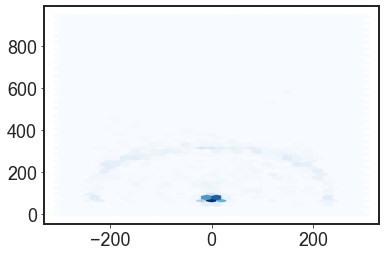

In [36]:
ax = plt.gca
# Plot hexbin of shots
# another example of shoddy code that people foist onto the world but it might give us ideas
# See if you can make this plot look nicer as part of your HW2

plt.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), cmap='Blues')

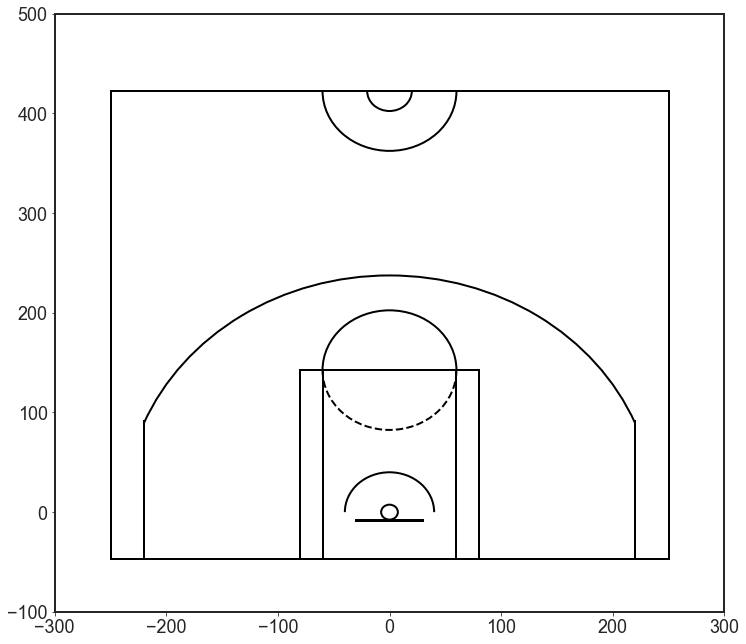

In [37]:
plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

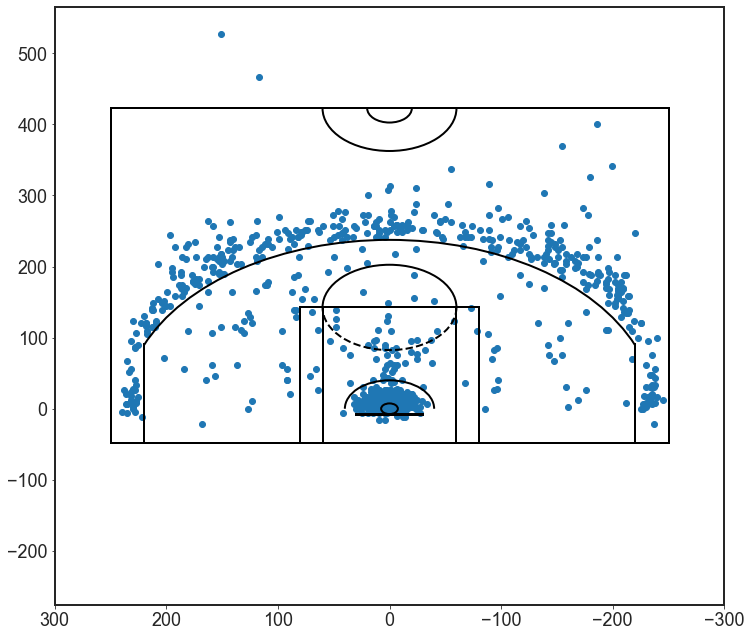

In [38]:
plt.figure(figsize=(12,11))
plt.scatter(curry_data.LOC_X, curry_data.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

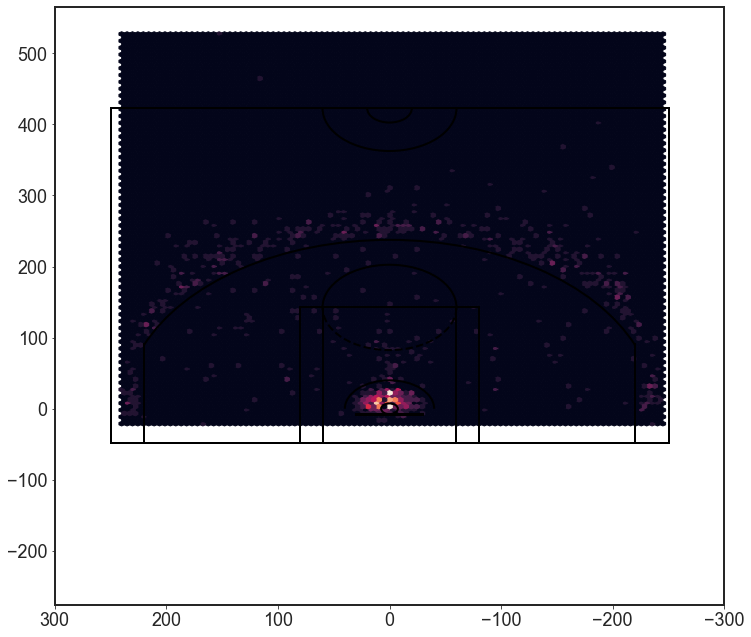

In [39]:
plt.figure(figsize=(12,11))
plt.hexbin(curry_data.LOC_X, curry_data.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.show()

In [ ]:
# And see i was able to get and then use an idea. 
# so just some thoughts because the plane is going to land soon and i wasnt able to record my process while on the plane
# First thought is don't trust code you found online
# I wound up having to use two links to complete this example
# because either python has been updated since those people wrote their code
# OR they were just sloppy  in their code writing
# I will be providing both links and 
# as another part of your HW2 (I want you to identify all the places where you think their code was sloppy and why)
# There are already some notes I have provided as to why but looking through and logically saying well that doesnt make sense
# essentially debugging someone else's code will probably teach you A LOT
# There are also so more shot charts and joint graphs that they gave examples for and I want you to see if you can fix them
# Or make them look nicer or do them in a more efficient way
# the attempt is what matters here. I don't know the correct answer
# ALSO: that happens more and more in college and grad school. the person asking the question wont necessarily know the answer


Helpful links and the examples

https://www.python-graph-gallery.com/84-hexbin-plot-with-matplotlib


https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d


http://savvastjortjoglou.com/nba-shot-sharts.html





D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


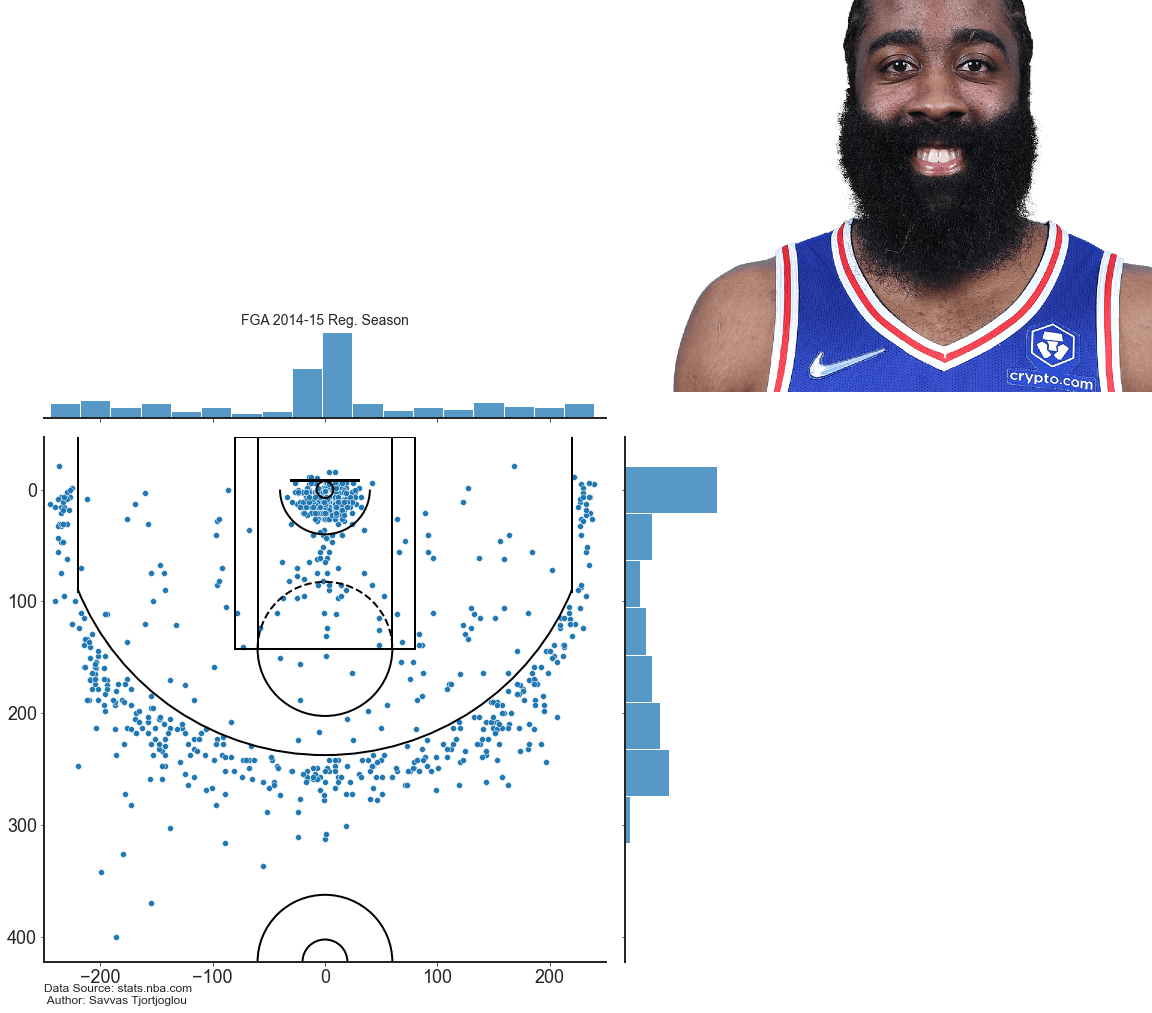

In [57]:
#create our jointplot
from matplotlib.offsetbox import OffsetImage

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(curry_data.LOC_X, curry_data.LOC_Y)

joint_shot_chart.fig.set_size_inches(12,11)

#A joint plot has 3 Axes, the first one called ax_joint 
#is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

#Adjust the axis limits and orientation of the plot in order
#to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

#Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

#Add a title
ax.set_title('FGA 2014-15 Reg. Season', y=1.2, fontsize=14)

#Add Data Source and Author
ax.text(-250,460,'Data Source: stats.nba.com \n Author: Savvas Tjortjoglou', fontsize=12)

#Add James Harden's image to the top right
harden_pic = mpl.image.imread("harden_pic.png")
img = OffsetImage(harden_pic, zoom=0.6)
img.set_offset((625,621))
ax.add_artist(img)

plt.show()